In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from NeuralNetworkModel import *
from tqdm import tqdm

In [10]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_train = df.drop(columns='label')
y_train = df['label']
x_train.head(), y_train.head()

(   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0       0       0       0       0       0       0       0       0       0   
 1       0       0       0       0       0       0       0       0       0   
 2       0       0       0       0       0       0       0       0       0   
 3       0       0       0       0       0       0       0       0       0   
 4       0       0       0       0       0       0       0       0       0   
 
    pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
 0       0  ...         0         0         0         0         0         0   
 1       0  ...         0         0         0         0         0         0   
 2       0  ...         0         0         0         0         0         0   
 3       0  ...         0         0         0         0         0         0   
 4       0  ...         0         0         0         0         0         0   
 
    pixel780  pixel781  pixel782  pixel783  
 0       

#### Convert image from **gray scale** to **black and white**

In [12]:
def convert(img):
    for i in range(len(img)):
        for j in range(len(img[i])):
            if img[i][j] > 0:
                img[i][j] = 1
    return img

#### Image before convert

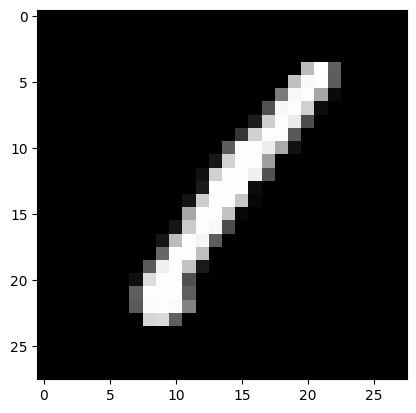

In [13]:
data = np.array(x_train.iloc[0, :]).reshape(28, 28)
plt.imshow(data, cmap='gray')

#### Image after convert

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 

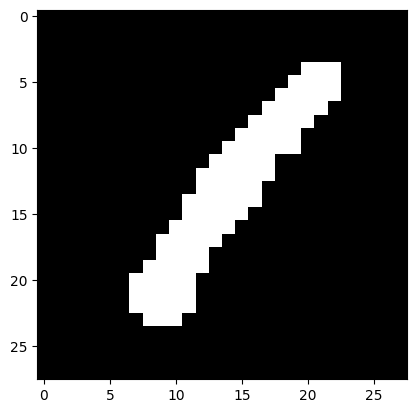

In [14]:
data = convert(data)
plt.imshow(data, cmap='gray')
print(data)

#### Convert X train

In [15]:
def convert_data(x_train):
    for i in range(len(x_train)):
        xi = x_train.iloc[i, :]
        img = np.array(xi).reshape(28, 28)
        con = convert(img)
        x_train.iloc[i, :] = np.array(con).reshape(784, )
        
convert_data(x_train)

#### One hot coding

In [16]:
def one_hot_coding(y_train):
    m = len(y_train.unique())
    y_new = []
    for i in y_train.values:
        y_n = [0] * m
        y_n[i] = 1
        y_new.append(y_n)
    y_new = pd.DataFrame(y_new)
    return y_new

#### Label after one hot

In [17]:
y_train_one_hot = one_hot_coding(y_train)
y_train_one_hot.index = y_train
print(y_train_one_hot)

       0  1  2  3  4  5  6  7  8  9
label                              
1      0  1  0  0  0  0  0  0  0  0
0      1  0  0  0  0  0  0  0  0  0
1      0  1  0  0  0  0  0  0  0  0
4      0  0  0  0  1  0  0  0  0  0
0      1  0  0  0  0  0  0  0  0  0
...   .. .. .. .. .. .. .. .. .. ..
0      1  0  0  0  0  0  0  0  0  0
1      0  1  0  0  0  0  0  0  0  0
7      0  0  0  0  0  0  0  1  0  0
6      0  0  0  0  0  0  1  0  0  0
9      0  0  0  0  0  0  0  0  0  1

[42000 rows x 10 columns]


#### Model

In [18]:
model = DeepNeuralNetwork(
    Layer(28*28),
    Layer(64, activation_func='relu'),
    Layer(64, activation_func='relu'),
    Layer(10, activation_func='softmax', train_bias=False),
    init='xavier',
    uniform=True
)

Loading Weights and Bias


check if `weights.npy` and `bias.npy` file if empty or not for training

In [ ]:
# model.empty_file() # !uncomment this to retraining

In [20]:
if model.is_file_empty('weights.npy') or model.is_file_empty('bias.npy'):
    training = True
else:
    training = False

**training**

In [21]:
if training:
    model.fit(x_train, y_train, lr=0.001, batch_size=64, epochs=10000)

Epochs: 100%|##########| 10000/10000 [08:45<00:00, 19.04it/s] 

Complete Saving Weights and Bias


In [22]:
y_pred = model.predict(x_train)

**accuracy**

In [23]:
acc = model.accuracy(y_train, y_pred)
print("accuracy train :", acc)

accuracy train : 0.9999761904761905


In [24]:
y_pred_one_hot = one_hot_coding(pd.Series(y_pred))

In [25]:
loss_train = model.cross_entropy_loss(y_train_one_hot.values, y_pred_one_hot.values)
print('loss train :', loss_train)

loss train : 0.0006578814561411098


#### Accuracy graph

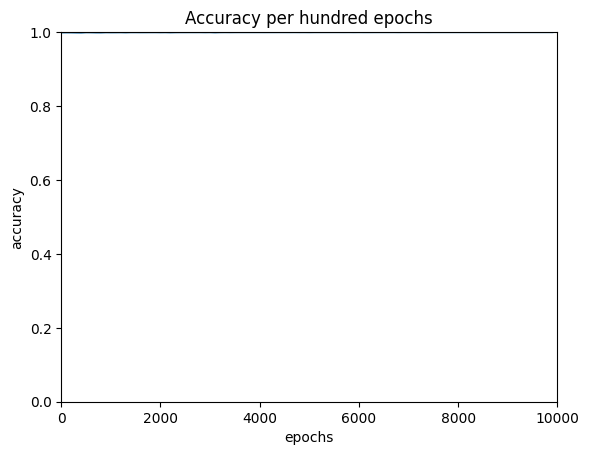

In [26]:
epoch = np.arange(0, model.epochs, 100)
plt.plot(epoch, model.accuracy_point)
plt.title('Accuracy per hundred epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.axis([0, model.epochs, 0.0, 1.00])
plt.show()

## Test Dataset

#### Read data

In [27]:
x_test = pd.read_csv('test.csv')
x_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y_test = pd.read_csv('submission.csv')
y_test = y_test['Label']
y_test.head()

0    2
1    0
2    9
3    9
4    3
Name: Label, dtype: int64

#### Convert Data

In [29]:
convert_data(x_test)

### Accuracy

In [30]:
y_pred_test = model.predict(x_test)
acc_test = model.accuracy(y_test, y_pred_test)
print('accuracy test :', acc_test)

accuracy test : 0.9666785714285714


### Loss

In [31]:
y_pred_test_oh = one_hot_coding(pd.Series(y_pred_test))
y_test_one_hot = one_hot_coding(y_test)
loss_test = model.cross_entropy_loss(y_test_one_hot.values, y_pred_test_oh.values)
print('loss test :', loss_test)

loss test : 0.9207050964710143


### Predict test set

In [32]:
def predict_test_set():
    rand = np.random.randint(0, 28000)
    x_rand = x_test.iloc[rand, :]
    x_rand = np.array(x_rand).reshape(28, 28)
    # print(x_rand)
    plt.imshow(x_rand, cmap='gray')
    plt.show()
    y_pred = model.predict_single_point(x_rand.reshape(784, 1))
    print("y_predict :", y_pred)

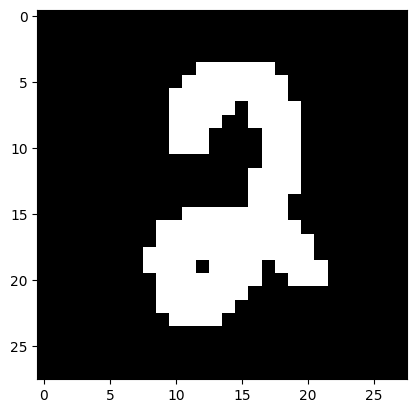

y_predict : 2


In [33]:
predict_test_set()